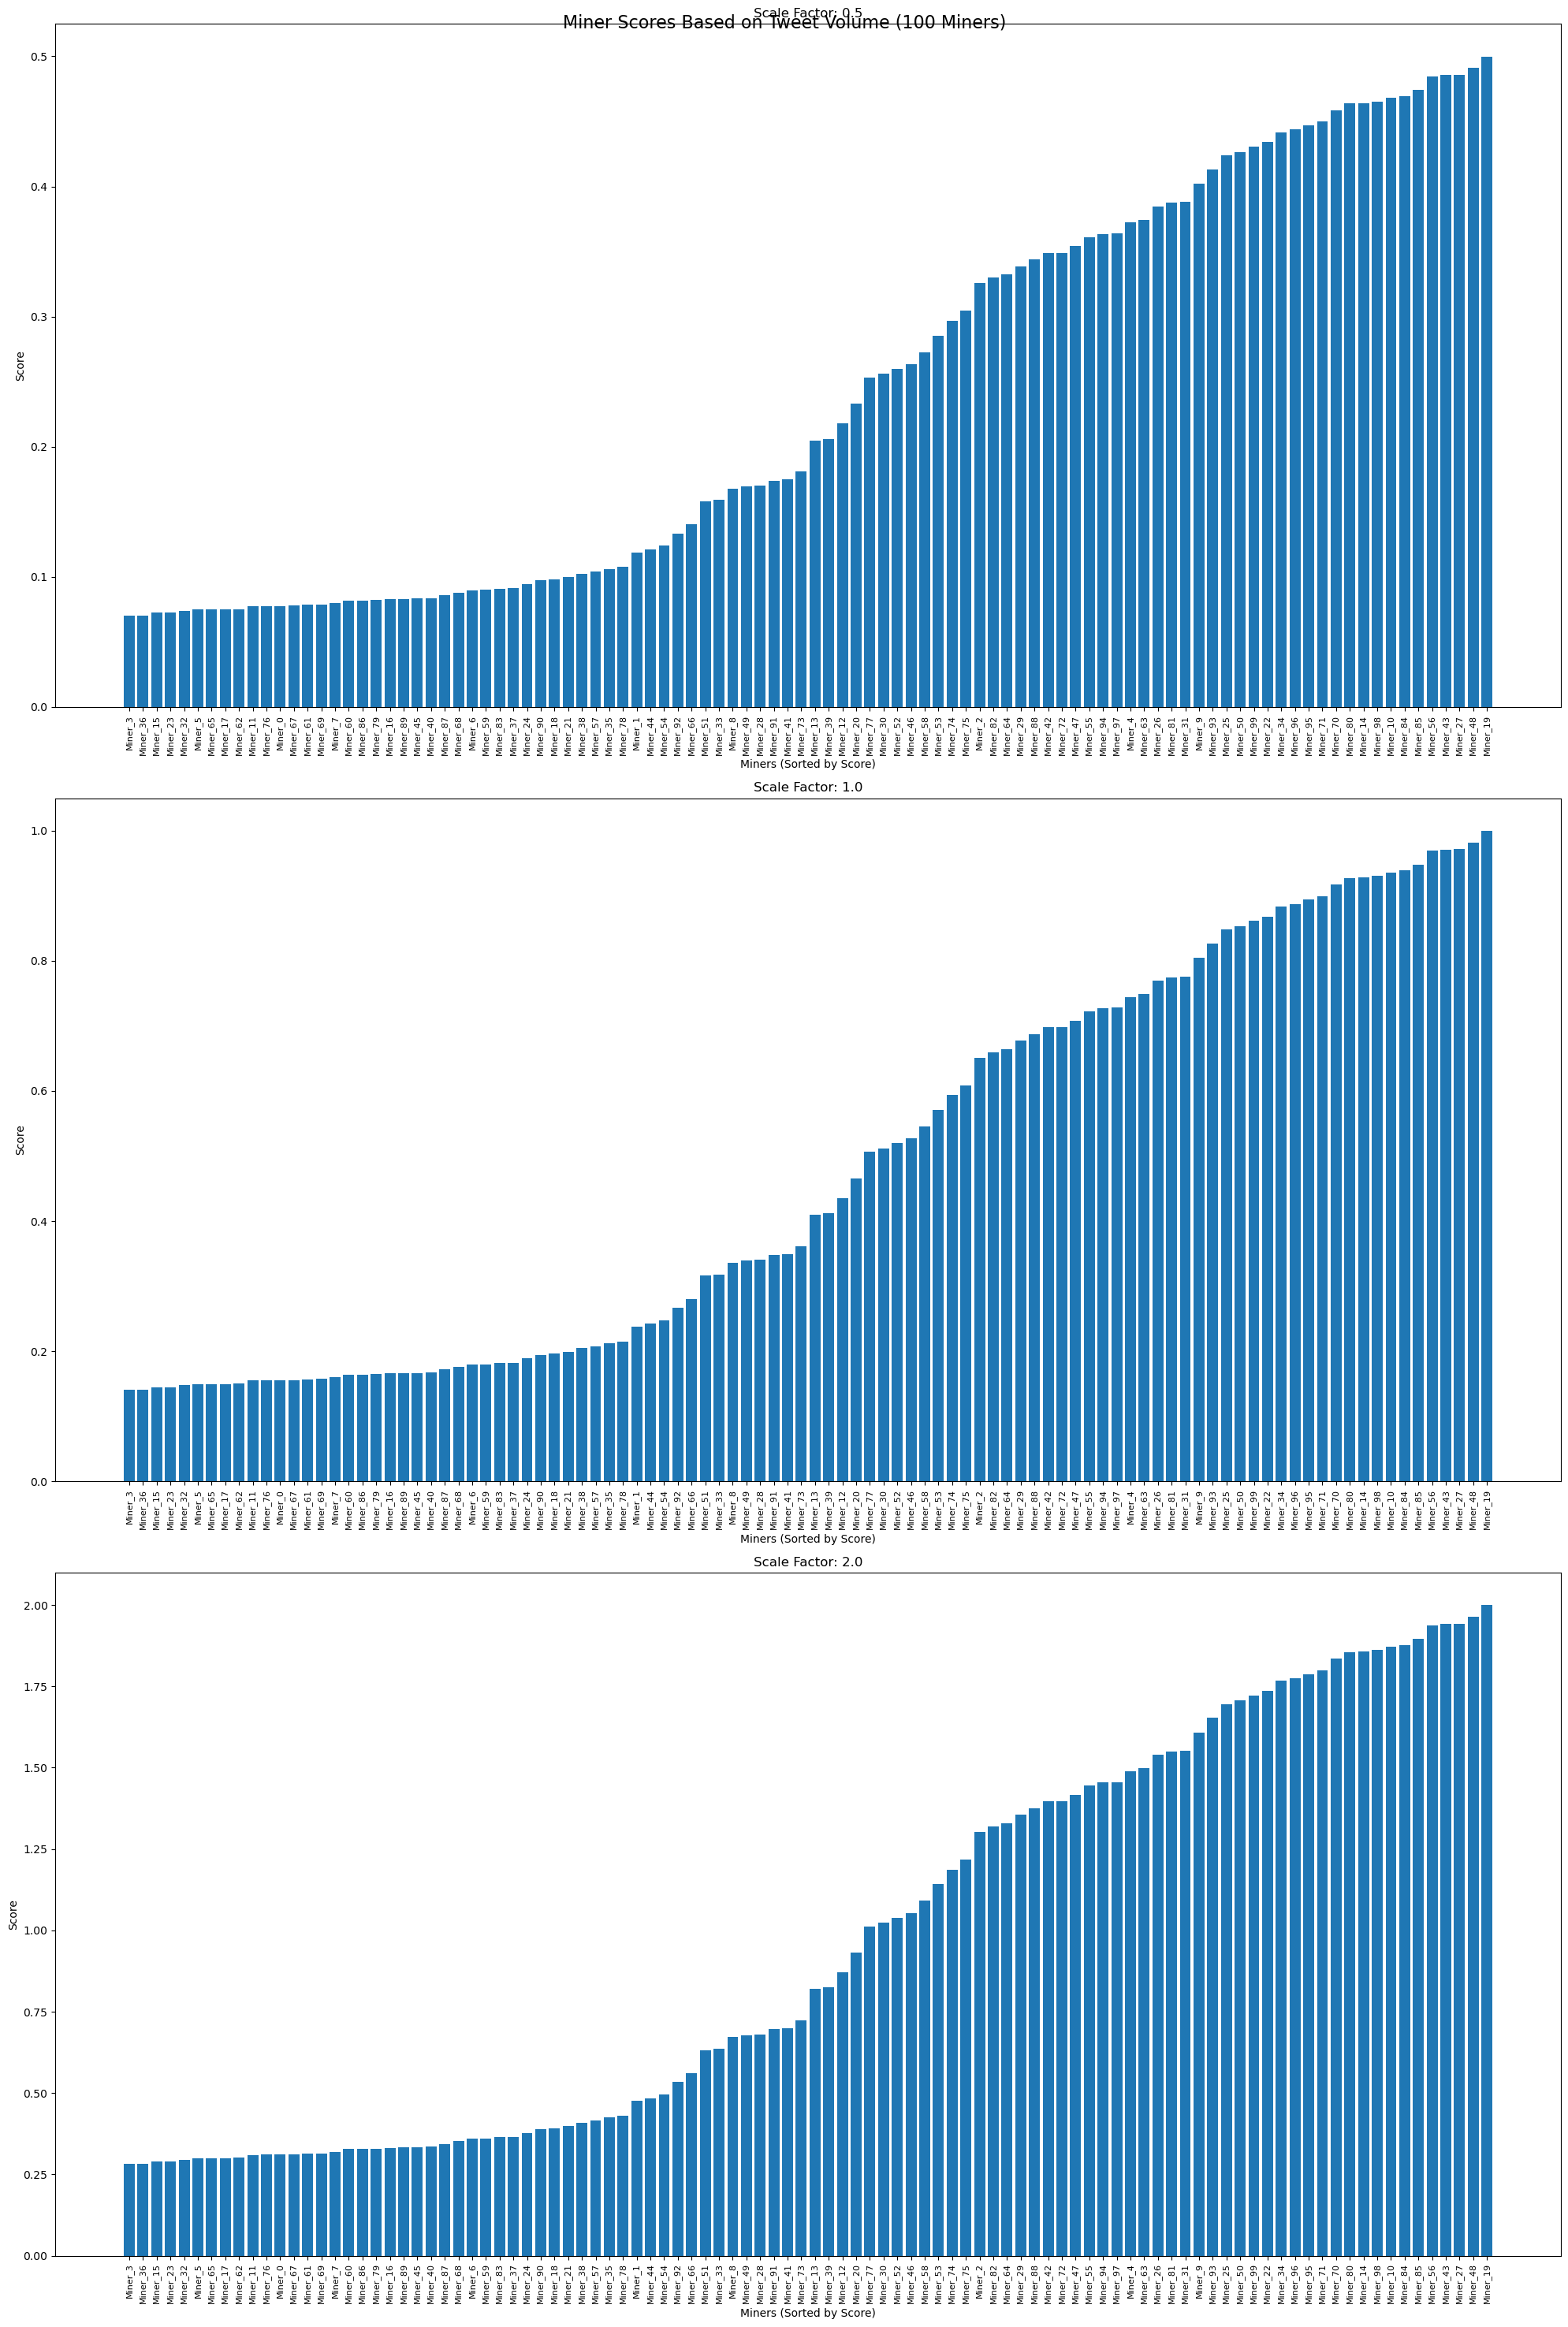

          Total Volume  Score (scale=0.5)  Score (scale=1.0)  \
Miner_19   3186.317551           0.499881           0.999762   
Miner_48   2213.960825           0.491043           0.982087   
Miner_27   2075.450144           0.485649           0.971297   
Miner_43   2073.356350           0.485550           0.971100   
Miner_56   2049.866254           0.484403           0.968805   
...                ...                ...                ...   
Miner_32     21.071493           0.073833           0.147666   
Miner_23     12.616899           0.072443           0.144885   
Miner_15     12.020509           0.072345           0.144691   
Miner_36      0.000000           0.070401           0.140802   
Miner_3       0.000000           0.070401           0.140802   

          Score (scale=2.0)  
Miner_19           1.999523  
Miner_48           1.964173  
Miner_27           1.942595  
Miner_43           1.942200  
Miner_56           1.937610  
...                     ...  
Miner_32           0.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests

real_data_response = requests.get("http://165.227.153.108:8000/volumes")
real_data = real_data_response.json()

# Extract statistics from real data
real_df = pd.DataFrame([entry['miners'] for entry in real_data])
mean_volumes = real_df.mean()
std_volumes = real_df.std()

# Simulation parameters
num_miners = 100
num_periods = len(real_data)
scale_factors = [0.5, 1.0, 2.0]

# Generate synthetic data based on real-world statistics
def generate_miner_data():
    base_volume = np.random.choice(mean_volumes)
    trend = np.random.uniform(-10, 10)
    noise = np.random.normal(0, np.mean(std_volumes), num_periods)
    volumes = base_volume + trend * np.arange(num_periods) + noise
    return np.maximum(volumes, 0)  # Ensure non-negative volumes

miner_data = {f"Miner_{i}": generate_miner_data() for i in range(num_miners)}
df = pd.DataFrame(miner_data)
total_volumes = df.sum()

# Scoring function
def kurtosis_based_score(volume, mean, std_dev, scale_factor=1.0):
    return 0 if std_dev == 0 else stats.norm.cdf((volume - mean) / std_dev) * scale_factor

# Calculate scores for different scale factors
mean_volume = total_volumes.mean()
std_dev_volume = total_volumes.std()
scores = {
    f"Score (scale={scale})": total_volumes.apply(
        lambda x: kurtosis_based_score(x, mean_volume, std_dev_volume, scale)
    )
    for scale in scale_factors
}

# Plotting
fig, axes = plt.subplots(len(scale_factors), 1, figsize=(20, 10 * len(scale_factors)))
fig.suptitle("Miner Scores Based on Tweet Volume (100 Miners)", fontsize=16)

for i, (scale, score) in enumerate(scores.items()):
    sorted_scores = score.sort_values(ascending=False)
    axes[i].bar(range(len(sorted_scores))[::-1], sorted_scores.values)
    axes[i].set_title(f"Scale Factor: {scale_factors[i]}")
    axes[i].set_xlabel("Miners (Sorted by Score)")
    axes[i].set_ylabel("Score")
    axes[i].set_xticks(range(len(sorted_scores))[::-1])
    axes[i].set_xticklabels(sorted_scores.index, rotation=90, ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Display data
result_df = pd.DataFrame({"Total Volume": total_volumes, **scores}).sort_values("Score (scale=1.0)", ascending=False)
print(result_df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>